# Introduction

In this project, we explore a dataset comprising various breakfast cereals to uncover patterns and insights related to their nutritional content and consumer ratings. The dataset includes 77 different cereals, each characterized by multiple nutritional metrics such as calories, protein, fat, fiber, and sugar content, as well as an overall consumer rating.

Dataset Overview

    Total Entries: 77 cereals
    Attributes: Each cereal is described by 16 attributes, including:
        Name: The brand and name of the cereal.
        Manufacturer: The company producing the cereal.
        Type: The type of cereal (e.g., cold or hot).
        Nutritional Content: Measures such as calories, protein, fat, sodium, fiber, carbohydrates, sugars, and potassium.
        Vitamins: Vitamin content as a percentage of FDA recommendation.
        Shelf: The shelf placement in stores.
        Weight: Weight of one serving.
        Cups: Recommended number of cups per serving.
        Rating: A consumer rating based on taste, nutrition, and other factors.

First, we will download the dataset, if it's not already downloaded.

In [7]:
import os
import requests
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# URL of the dataset
url = 'https://drive.google.com/uc?export=download&id=1DxyfbHcR2VegKsqgptpkFWhXO5zaWlWc'
file_name = 'dataset.csv'  # The name of the file
file_path = os.path.join(os.getcwd(), file_name)  # Join the current working directory with the file name

def download_dataset(url, file_path):
    if not os.path.exists(file_path):
        print("Downloading dataset...")
        response = requests.get(url)
        with open(file_path, 'wb') as f:
            f.write(response.content)
        print("Download completed!")
    else:
        print("Dataset already downloaded.")

download_dataset(url, file_path)

# cereal_data = pd.read_csv("Breakfast-Cereals.csv")
cereal_data = pd.read_csv("dataset.csv")


Dataset already downloaded.


Then, we will clean the dataset.

In [3]:
# note to group members: add any other methods of cleaning the data we should have in here

# Fill missing values in 'carbo' and 'sugars' with their respective means
cereal_data['carbo'].fillna(cereal_data['carbo'].mean(), inplace=True)
cereal_data['sugars'].fillna(cereal_data['sugars'].mean(), inplace=True)

# Fill missing values in 'potass' with the median
cereal_data['potass'].fillna(cereal_data['potass'].median(), inplace=True)


# Visualizations

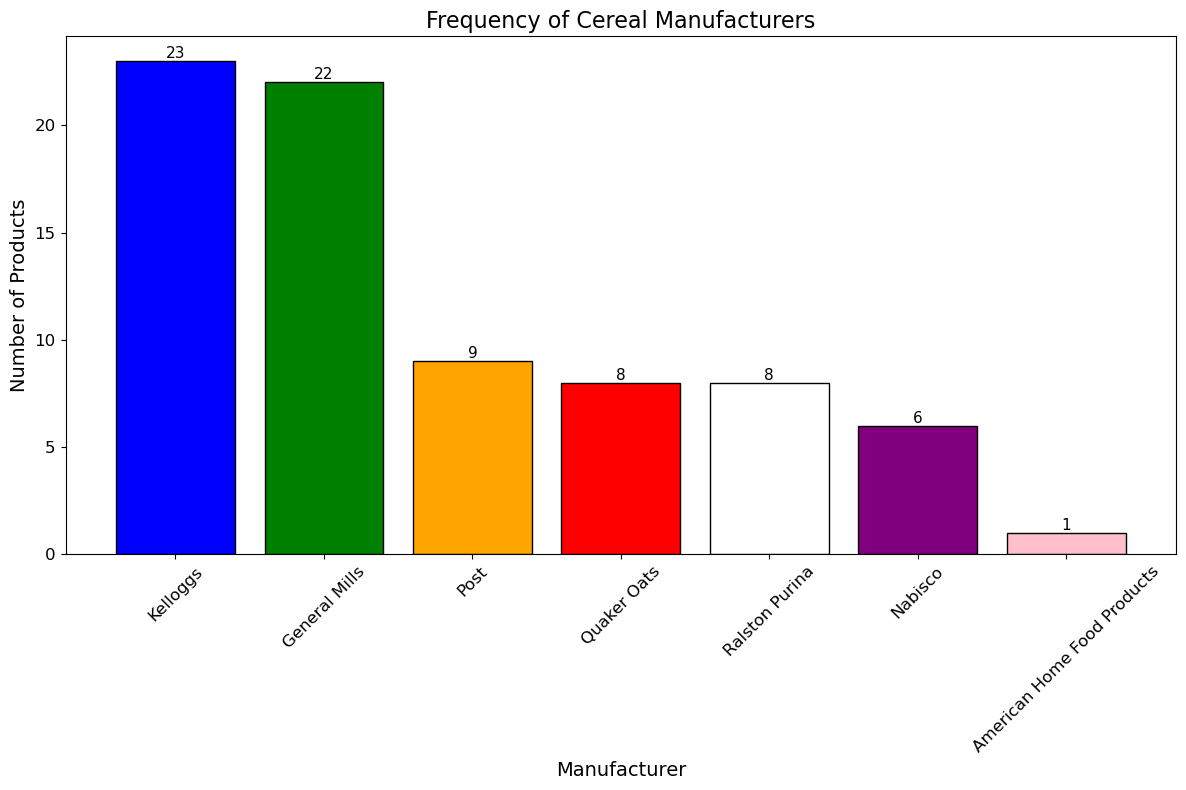

In [11]:
manufacturer_map = {
    'A': 'American Home Food Products',
    'G': 'General Mills',
    'K': 'Kelloggs',
    'N': 'Nabisco',
    'P': 'Post',
    'Q': 'Quaker Oats',
    'R': 'Ralston Purina'
}

cereal_data['manufacturer_name'] = cereal_data['mfr'].map(manufacturer_map)

manufacturer_counts = cereal_data['manufacturer_name'].value_counts()

plt.figure(figsize=(12, 8))
bars = plt.bar(manufacturer_counts.index, manufacturer_counts.values, color=['blue', 'green', 'orange', 'red', 'white', 'purple', 'pink'], edgecolor='black')

plt.title('Frequency of Cereal Manufacturers', fontsize=16)
plt.xlabel('Manufacturer', fontsize=14)
plt.ylabel('Number of Products', fontsize=14)

plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)



for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom', fontsize=11)

plt.tight_layout()
plt.show()




# Frequency of Manufacturers Graph

##  Goal of Graph

The goal of this graph is to explore which manufacturers appear the most to see which ones dominate the industry. As we can see Kellogs is the most dominant with General Mills at a close second. We will build on this to see how similar the company cereals are.

In [7]:
cereal_data

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,manufacturer_name
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973,Nabisco
1,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679,Quaker Oats
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505,Kelloggs
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912,Kelloggs
4,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8.0,NaN,25,3,1.0,0.75,34.384843,Ralston Purina
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3.0,60.0,25,3,1.0,0.75,39.106174,General Mills
73,Trix,G,C,110,1,1,140,0.0,13.0,12.0,25.0,25,2,1.0,1.00,27.753301,General Mills
74,Wheat_Chex,R,C,100,3,1,230,3.0,17.0,3.0,115.0,25,1,1.0,0.67,49.787445,Ralston Purina
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3.0,110.0,25,1,1.0,1.00,51.592193,General Mills


In [12]:
cereal_data['calpro'] = cereal_data['calories'] / cereal_data['protein'] 

#I am doing this for the next plot

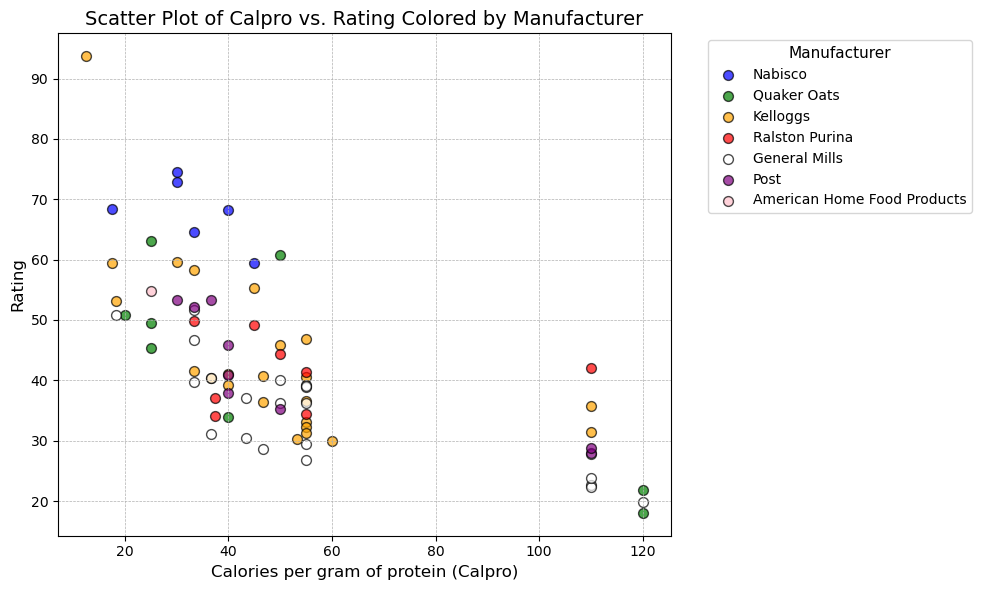

In [13]:
fig, ax = plt.subplots(figsize=(10, 6))

custom_colors = ['blue', 'green', 'orange', 'red', 'white', 'purple', 'pink']
manufacturers = cereal_data['manufacturer_name'].unique()
colors = np.resize(custom_colors, len(manufacturers))

for i, manufacturer in enumerate(manufacturers):
    subset = cereal_data[cereal_data['manufacturer_name'] == manufacturer]
    ax.scatter(subset['calpro'], subset['rating'], color=colors[i], label=manufacturer,
               alpha=0.7, edgecolors='k', s=50)  

ax.set_xlabel('Calories per gram of protein (Calpro)', fontsize=12)
ax.set_ylabel('Rating', fontsize=12)
ax.set_title('Scatter Plot of Calpro vs. Rating Colored by Manufacturer', fontsize=14)
ax.grid(True, which='both', linestyle='--', linewidth=0.5)
ax.legend(title='Manufacturer', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10, title_fontsize=11)

plt.tight_layout()
plt.show()


# Calories Per Protein to Rating ScatterPlot

As someone who cares a lot about CPP when they eat, I wanted to see the visualization between it and the rating. Based on the last plot, I also wanted to see if visually manufacturer had some effet. Looking at the plot, in general I can see that General Mills regardless of Calories per gram of protein is rated lower than the other brands while Nabisco in general seems to be higher in rating.

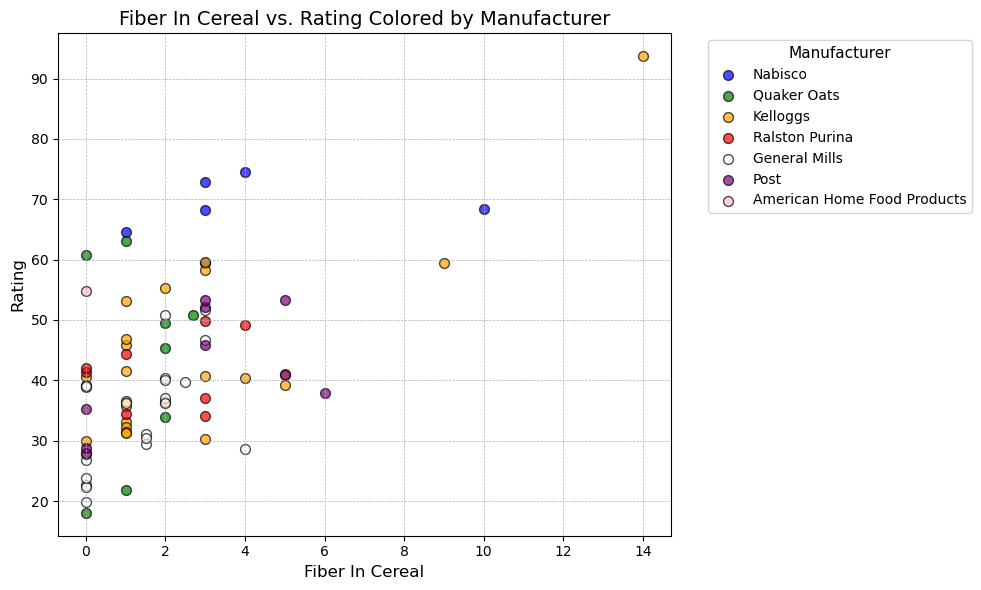

In [14]:
fig, ax = plt.subplots(figsize=(10, 6))

custom_colors = ['blue', 'green', 'orange', 'red', 'white', 'purple', 'pink']
manufacturers = cereal_data['manufacturer_name'].unique()
colors = np.resize(custom_colors, len(manufacturers))

for i, manufacturer in enumerate(manufacturers):
    subset = cereal_data[cereal_data['manufacturer_name'] == manufacturer]
    ax.scatter(subset['fiber'], subset['rating'], color=colors[i], label=manufacturer,
               alpha=0.7, edgecolors='k', s=50)  

ax.set_xlabel('Fiber In Cereal', fontsize=12)
ax.set_ylabel('Rating', fontsize=12)
ax.set_title('Fiber In Cereal vs. Rating Colored by Manufacturer', fontsize=14)
ax.grid(True, which='both', linestyle='--', linewidth=0.5)
ax.legend(title='Manufacturer', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10, title_fontsize=11)

plt.tight_layout()
plt.show()


# Fiber to Rating ScatterPlot

I also wanted to explore fiber content in cereal and compare it to rating as well. The visual correaltion is strong here as well, as in general it does seem that as fiber increases rating does as well. Interestingly, the General Mills trend always being at the bottom which we saw in the Calpro to Rating plot is not as apparent. However, the Nabisco trend still is.

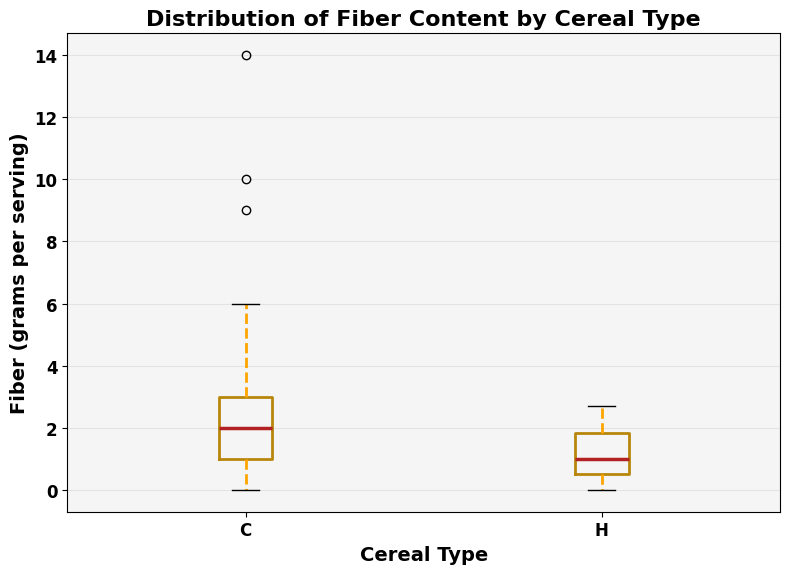

In [11]:
fig, ax = plt.subplots(figsize=(8, 6))
boxprops = dict(linestyle='-', linewidth=2, color='darkgoldenrod')
whiskerprops = dict(linestyle='--', linewidth=2, color='orange')
medianprops = dict(linestyle='-', linewidth=2.5, color='firebrick')
cereal_data.boxplot(column='fiber', by='type', ax=ax, grid=False, boxprops=boxprops, whiskerprops=whiskerprops, medianprops=medianprops)

# Set plot titles and labels with enhanced fonts
ax.set_title('Distribution of Fiber Content by Cereal Type', fontsize=16, fontweight='bold')
ax.set_xlabel('Cereal Type', fontsize=14, fontweight='bold')
ax.set_ylabel('Fiber (grams per serving)', fontsize=14, fontweight='bold')
plt.suptitle('')  # Remove the default 'Boxplot grouped by type' title

# Improving the tick labels for better readability
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')

# Adding a light background grid for better readability
ax.yaxis.grid(True, linestyle='-', which='major', color='lightgrey', alpha=0.5)

# Set the background color
ax.set_facecolor('whitesmoke')

# Show the plot
plt.tight_layout()
plt.show()

# Fiber Distribution on Hot Or Cold Cereal

I wanted to explore whether hot or cold cereals tended to have more fiber. In general the median for cold cereals was higher as well as the max. Both the hot and the cold have at least 1 cereal with 0 grams of fiber. In general, fiber is not overly present in Hot cereal as the max fiber is 2 grams

In [12]:
cereal_data.columns

Index(['name', 'mfr', 'type', 'calories', 'protein', 'fat', 'sodium', 'fiber',
       'carbo', 'sugars', 'potass', 'vitamins', 'shelf', 'weight', 'cups',
       'rating', 'manufacturer_name', 'calpro'],
      dtype='object')

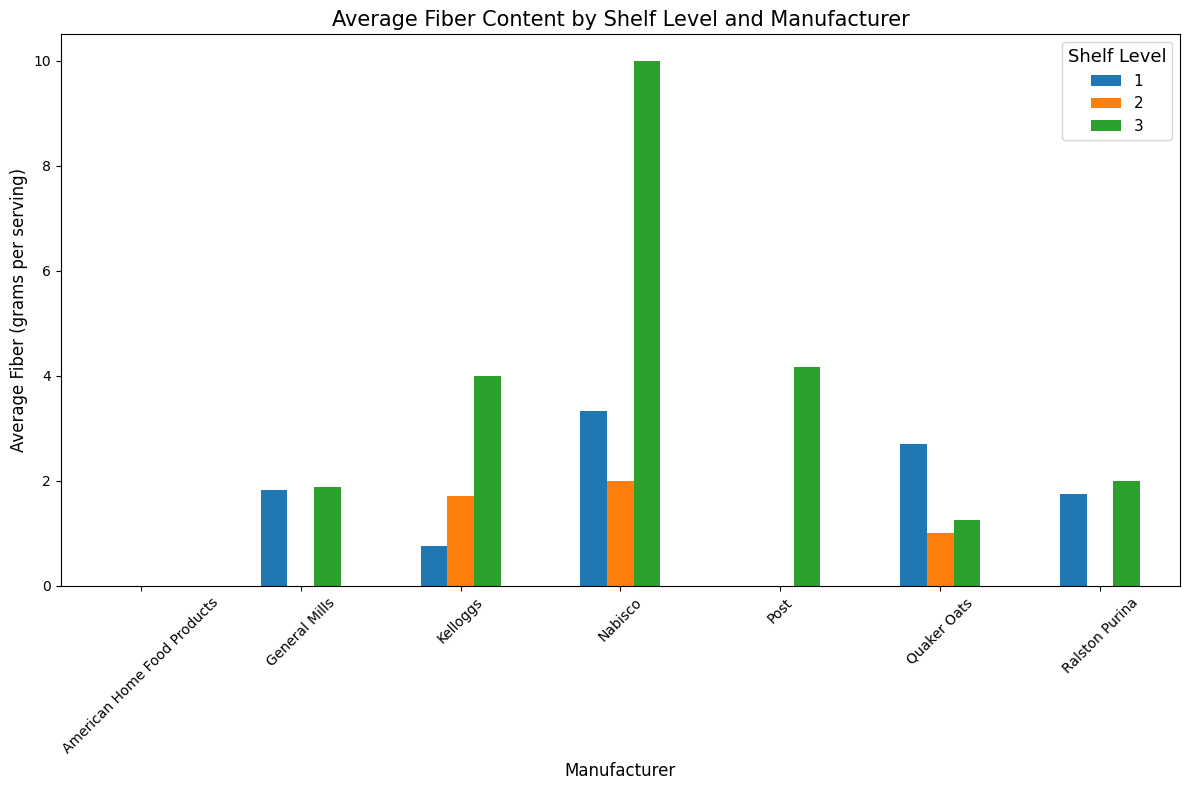

In [13]:
grouped_data = cereal_data.groupby(['manufacturer_name', 'shelf'])['fiber'].mean().unstack()

# Plot the results
fig, ax = plt.subplots(figsize=(12, 8))
grouped_data.plot(kind='bar', ax=ax)

# Adding plot aesthetics
ax.set_title('Average Fiber Content by Shelf Level and Manufacturer', fontsize=15)
ax.set_xlabel('Manufacturer', fontsize=12)
ax.set_ylabel('Average Fiber (grams per serving)', fontsize=12)
ax.legend(title='Shelf Level', title_fontsize='13', fontsize='11')
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

I found this graph the most interesting becuase it showed some correaltion between shelf level and protein quantity. With the exception of Quaker Oats, 3 consistently had the highest Average fiber. American Home Food Products has nothing becuase the 1 item has no fiber at all. Other empties either have no items in that shelf category or they are also at 0 fiber.

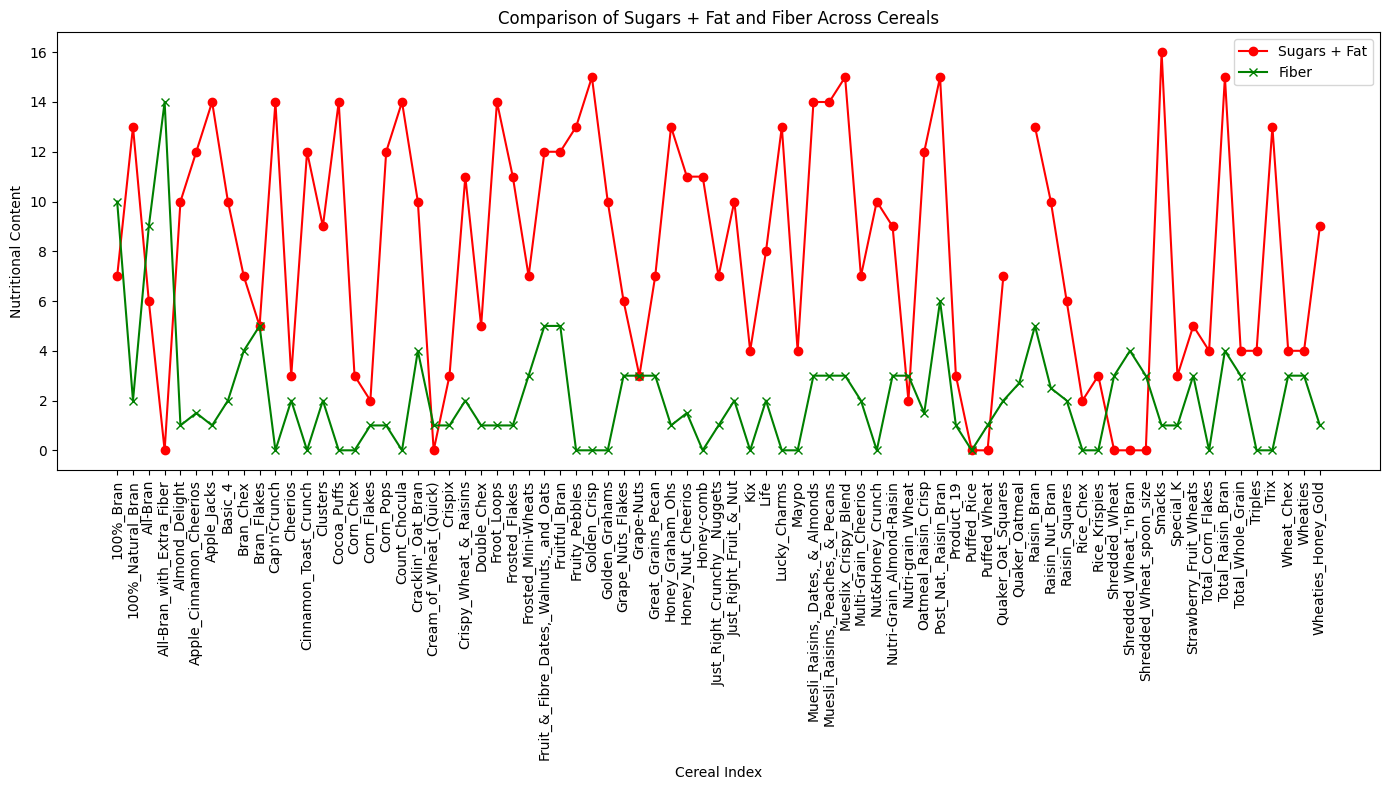

In [14]:
cereal_data['sugars_fat'] = cereal_data['sugars'] + cereal_data['fat']

plt.figure(figsize=(14, 8))

x_ticks = list(range(len(cereal_data)))

plt.plot(x_ticks, cereal_data['sugars_fat'], label='Sugars + Fat', color='r', marker='o')
plt.plot(x_ticks, cereal_data['fiber'], label='Fiber', color='g', marker='x')


plt.title('Comparison of Sugars + Fat and Fiber Across Cereals')
plt.xlabel('Cereal Index')
plt.ylabel('Nutritional Content')
plt.xticks(x_ticks, cereal_data['name'], rotation=90) 

plt.legend()

plt.tight_layout()

plt.show()


# Fiber vs Sugar + Fat

As expected cereals in general have a lot more sugar and fat than fiber. However, we do see a few exceptions. Most of the Bran cereals with a few exceptions. Fruity pebbles have a horrible sugar + fat to fiber ratio, and a lot of cereals do not even have any fiber. It will be interesting to see how this corresponds with rating in our analysis. 

# Analysis

TODO : 
1. create helper functions in a .py file and add then to this visualizations notebook. this will make code cleaner.
2. write explanations for each step
3. complete conclusions
4. any other relations? how can we utilize prev visualizations by taneesh?

## Testing the Hypothesis

Our hypothesis: Cereals with higher amount of fiber per serving are more calorie-efficient in terms of nutritional value per calorie, thus more likely to be placed on higher shelves in grocery stores since higher shelves are more visible to customers than lower shelves.


Until now, we created several visualizations to understand the dataset and how fiber itself is related to variables like shelf level, manufacturer, type (hot or cold) of the cereal. We also found calorie per protein to see one way in which nutritional value can be measured broadly and compared to its rating.

To analyze the dataset further to come up with a conclusion for our hypothesis, we need to understand several ideas and relationships in this chronological order:
  1. How can we find a way to measure how 'healthy' a ceral is?
  1. What does it mean to be calorie-efficient?
  1. How does rating compare to shelf level? Would higher rated cereals be placed on higher shelves?
  2. How does fiber content impact the cereal's rating?
  3. Are cereals with higher content more calorie efficient?
  4. Are cereals that are more calorie efficient placed on higher shelves.

### 1. How can we find a way to measure how 'healthy' a cereal is?

Before testing this hypothesis, it is important to give each cereal a health_value. This should measure how "healthy" the cereal is. We will base this off of the following factors, which are generally true:
  - higher fiber content is healthier
  - lower sugar content is healthier
  - higher protein content is healthier
  - lower sodium content is healthier
  - higher content of vitamins is healthier

We will not factor in 'carbo' or 'fat' because not all carbohydrates and fats are the same. 

'health_value' will also be normalized to a common scale from 0-1.

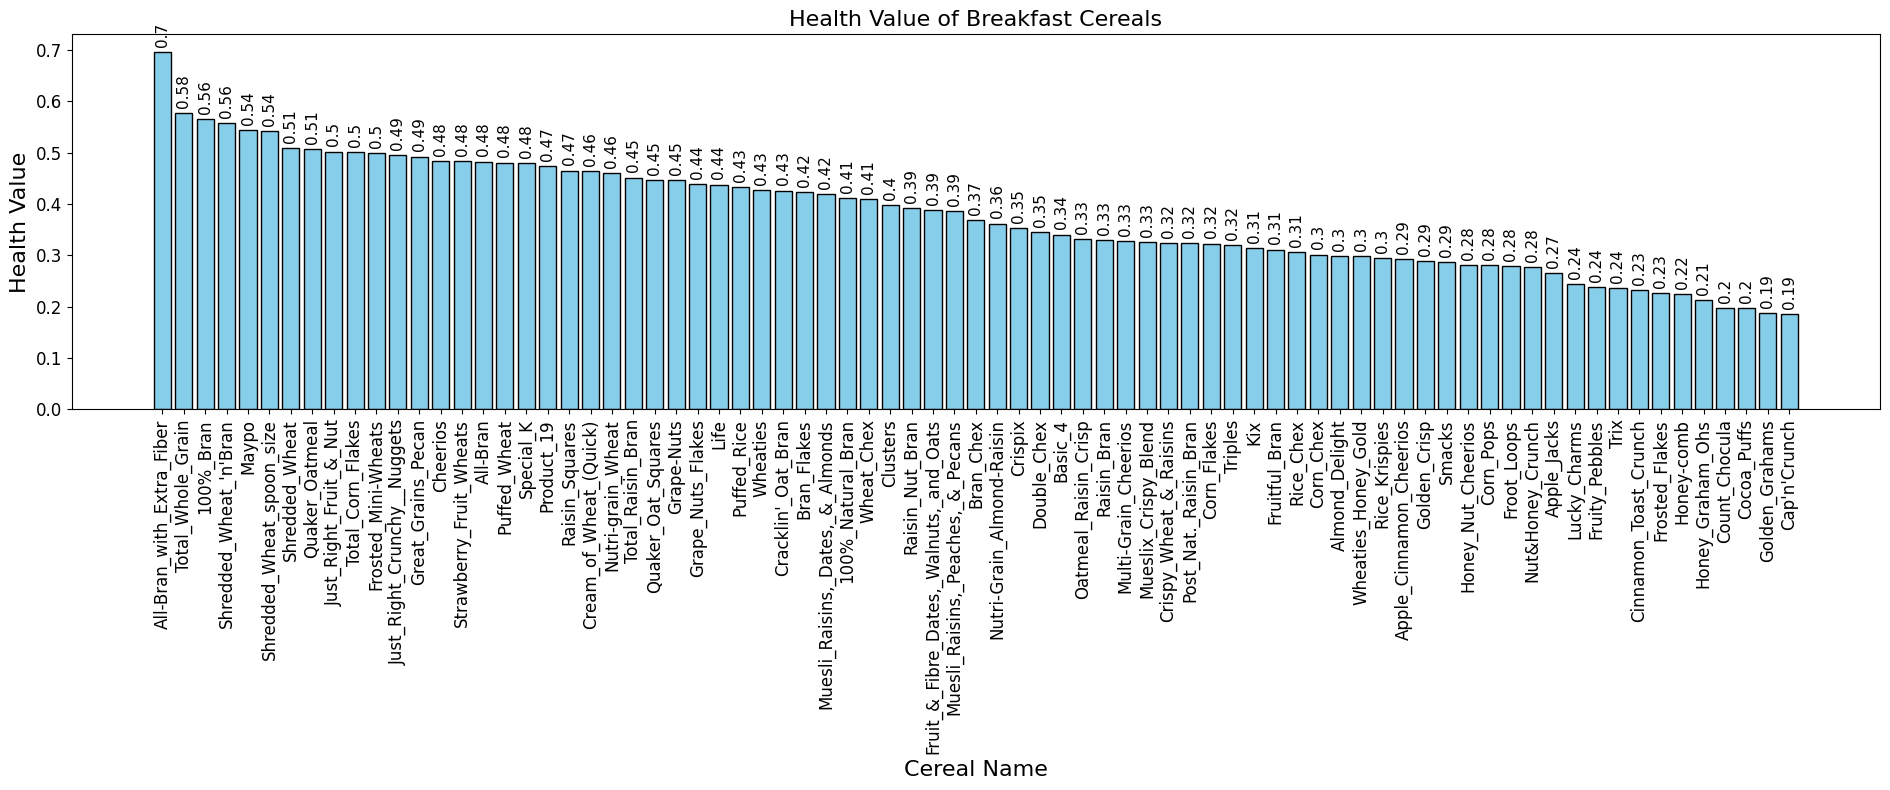

In [36]:
cereal_data['fiber_norm'] = cereal_data['fiber'] / cereal_data['fiber'].max()
cereal_data['protein_norm'] = cereal_data['protein'] / cereal_data['protein'].max()
cereal_data['vitamins_norm'] = cereal_data['vitamins'] / cereal_data['vitamins'].max()

 # Inverted because lower sugar and sodium is healthier
cereal_data['sugars_norm'] = 1 - cereal_data['sugars'] / cereal_data['sugars'].max()
cereal_data['sodium_norm'] = 1 - cereal_data['sodium'] / cereal_data['sodium'].max()

# create the 'health_value' column as the average of the normalized columns
cereal_data['health_value'] = cereal_data[['fiber_norm', 'protein_norm', 'vitamins_norm', 'sugars_norm', 'sodium_norm']].mean(axis=1)

# sort the data by the 'health_value' column
cereal_data = cereal_data.sort_values('health_value', ascending=False)

# plot the health value of each cereal
plt.figure(figsize=(19, 8))
bars = plt.bar(cereal_data['name'], cereal_data['health_value'], color='skyblue', edgecolor='black')

plt.title('Health Value of Breakfast Cereals', fontsize=16)
plt.xlabel('Cereal Name', fontsize=16)
plt.ylabel('Health Value', fontsize=16)

plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 2), ha='center', va='bottom', fontsize=11, rotation=90)

plt.tight_layout()
plt.show()

This bar chart shows a ranking of cereals by a composite 'health value'. Cereals like 'All-Bran with Extra Fiber' score highest, while cereals like 'Golden Crisp' and 'Cocoa Puffs' score lowest, highlighting a wide range in health values among breakfast cereals.

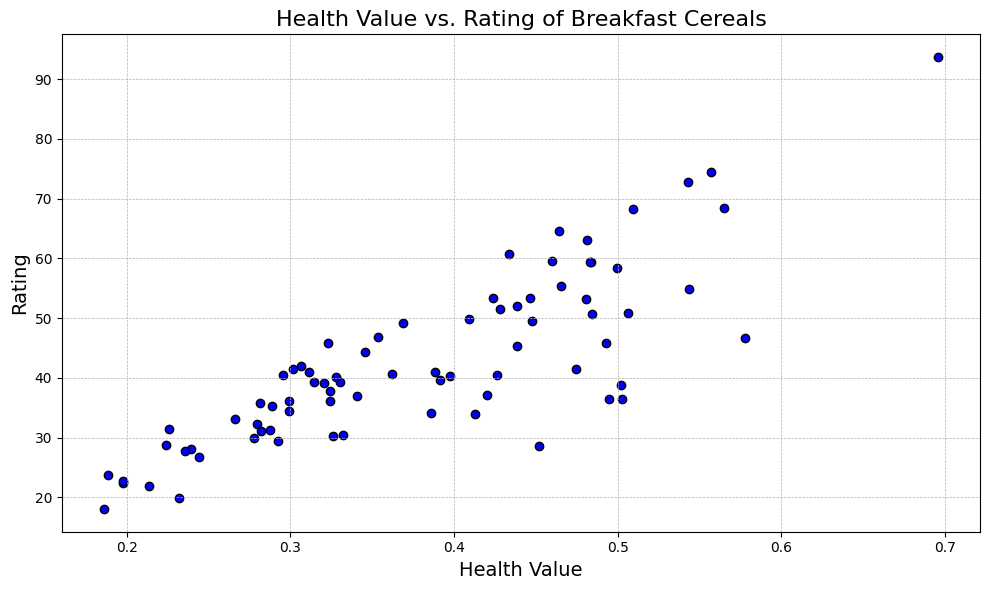

In [37]:
# create a scatter plot of health value vs. rating
plt.figure(figsize=(10, 6))
plt.scatter(cereal_data['health_value'], cereal_data['rating'], color='blue', edgecolor='black')
plt.title('Health Value vs. Rating of Breakfast Cereals', fontsize=16)
plt.xlabel('Health Value', fontsize=14)
plt.ylabel('Rating', fontsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


The scatter plot shows that while there's a general trend of higher health values correlating with higher ratings, there are many exceptions. This could indicate that factors beyond the measured health value affect consumer ratings.

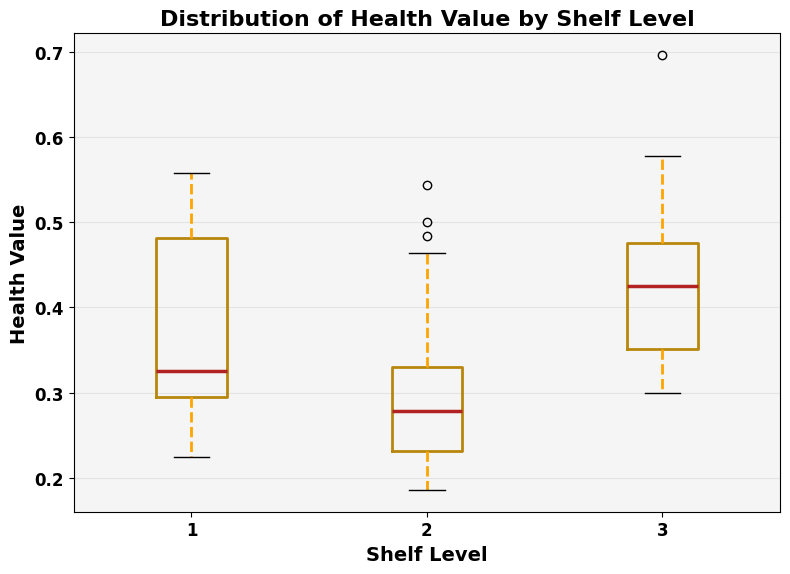

In [38]:
# create a box plot of health value vs. shelf level
fig, ax = plt.subplots(figsize=(8, 6))
boxprops = dict(linestyle='-', linewidth=2, color='darkgoldenrod')
whiskerprops = dict(linestyle='--', linewidth=2, color='orange')
medianprops = dict(linestyle='-', linewidth=2.5, color='firebrick')
cereal_data.boxplot(column='health_value', by='shelf', ax=ax, grid=False, boxprops=boxprops, whiskerprops=whiskerprops, medianprops=medianprops)

# Set plot titles and labels with enhanced fonts
ax.set_title('Distribution of Health Value by Shelf Level', fontsize=16, fontweight='bold')
ax.set_xlabel('Shelf Level', fontsize=14, fontweight='bold')
ax.set_ylabel('Health Value', fontsize=14, fontweight='bold')
plt.suptitle('')  # Remove the default 'Boxplot grouped by type' title

# Improving the tick labels for better readability
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')

# Adding a light background grid for better readability
ax.yaxis.grid(True, linestyle='-', which='major', color='lightgrey', alpha=0.5)

# Set the background color
ax.set_facecolor('whitesmoke')

# Show the plot
plt.tight_layout()
plt.show()

The box plot suggests variability in health value across shelf levels, with some levels having a wider range and higher median health values. This can imply that healthier options are more variably placed on shelves.

### 2. What does it mean to be more calorie-efficient?



In [44]:
# normalize the 'calories' column (inverted because lower calories are healthier)
cereal_data['calories_norm'] = 1 - cereal_data['calories'] / cereal_data['calories'].max()

# calculate calorie efficiency = average of the normalized nutritional columns divided by calories
cereal_data['calorie_efficiency'] = cereal_data[['fiber_norm', 'protein_norm', 'vitamins_norm', 'sugars_norm', 'sodium_norm']].mean(axis=1) / cereal_data['calories']

# create a scatter plot of calorie efficiency vs. rating


### 3. How does rating compare to shelf level? Would higher rated cereals be placed on higher shelves?

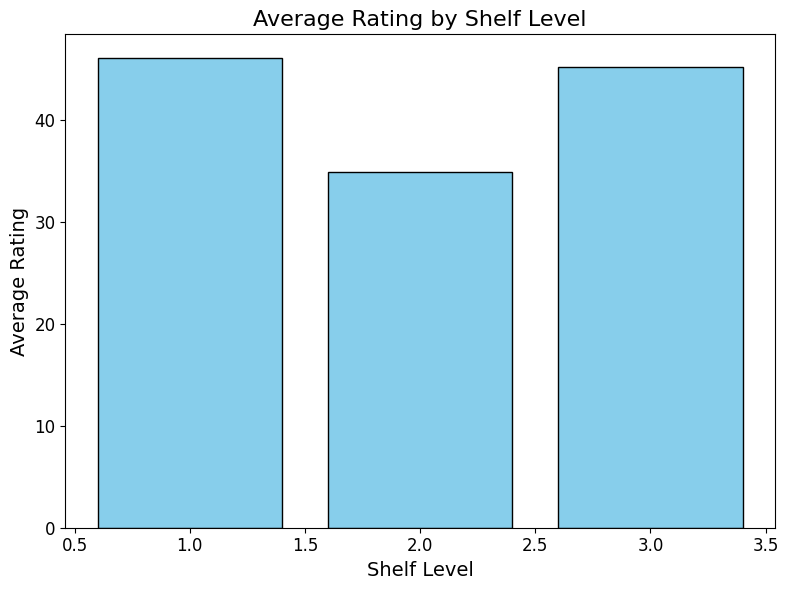

In [39]:
# compare rating with shelf level to see if higher rated cereals are placed on higher shelves
grouped_data = cereal_data.groupby(['shelf'])['rating'].mean()

plt.figure(figsize=(8, 6))
plt.bar(grouped_data.index, grouped_data.values, color='skyblue', edgecolor='black')

plt.title('Average Rating by Shelf Level', fontsize=16)
plt.xlabel('Shelf Level', fontsize=14)
plt.ylabel('Average Rating', fontsize=14)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

This bar chart shows little variation in average cereal ratings across different shelf levels. This indicates that shelf placement is not a strong indicator of a product's average consumer rating.

### 4. How does fiber content impact the cereal's rating?

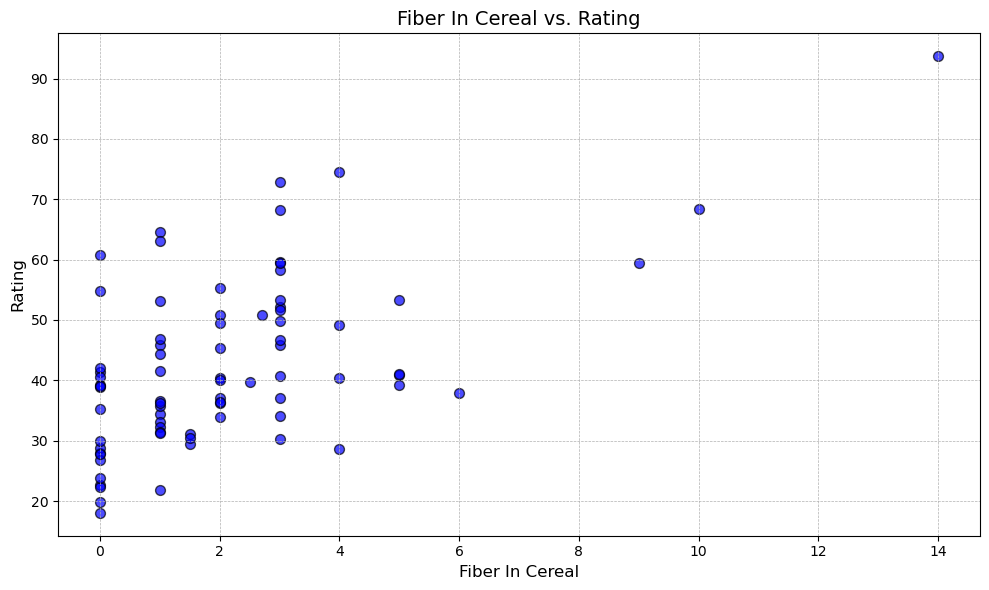

In [15]:
#  compare fiber content with rating to see if cereals with higher fiber content are rated higher

fig, ax = plt.subplots(figsize=(10, 6))

ax.scatter(cereal_data['fiber'], cereal_data['rating'], color='blue', alpha=0.7, edgecolors='k', s=50)

ax.set_xlabel('Fiber In Cereal', fontsize=12)

ax.set_ylabel('Rating', fontsize=12)


ax.set_title('Fiber In Cereal vs. Rating', fontsize=14)

ax.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()


This chart shows a positive trend between fiber content and cereal ratings, reinforcing the idea that fiber content may positively influence consumer perception.

### 5. Are cereals with higher fiber content more calorie-efficient?

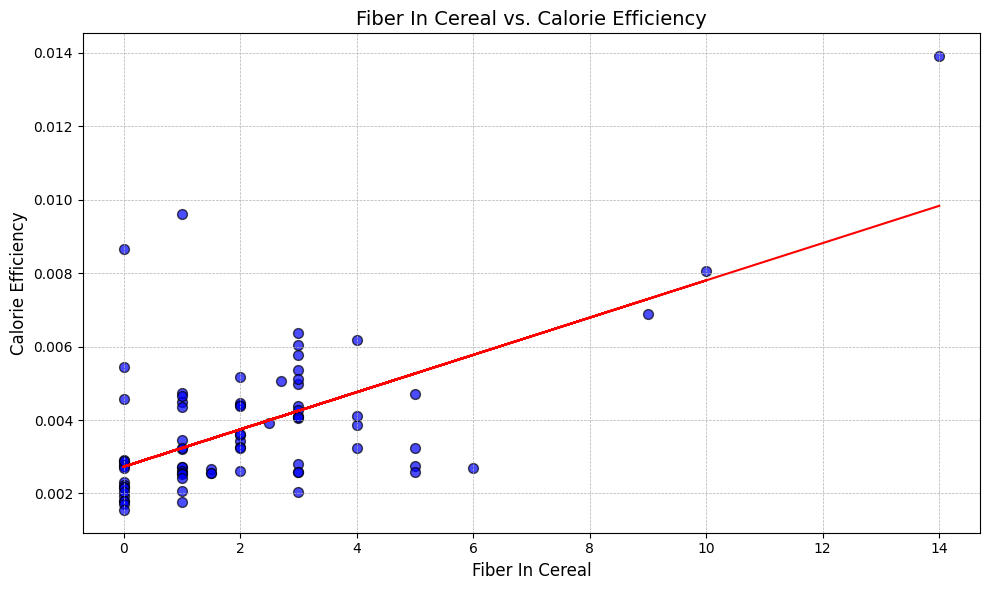

In [45]:
# compare fiber content with its calorie efficiency to see if cereals with higher fiber content are more calorie-efficient

# calculate coefficients for the line of best fit
m, b = np.polyfit(cereal_data['fiber'], cereal_data['calorie_efficiency'], 1)

# plot the scatter plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(cereal_data['fiber'], cereal_data['calorie_efficiency'], color='blue', alpha=0.7, edgecolors='k', s=50)

# plot the line of best fit
ax.plot(cereal_data['fiber'], m*cereal_data['fiber'] + b, color='red')

ax.set_xlabel('Fiber In Cereal', fontsize=12)
ax.set_ylabel('Calorie Efficiency', fontsize=12)
ax.set_title('Fiber In Cereal vs. Calorie Efficiency', fontsize=14)
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()


The scatter plot with a trendline suggests a positive correlation between fiber content and calorie efficiency, indicating that higher fiber cereals offer more nutritional value per calorie.

### 6. Are cereals that are more calorie-efficient placed on higher shelves?

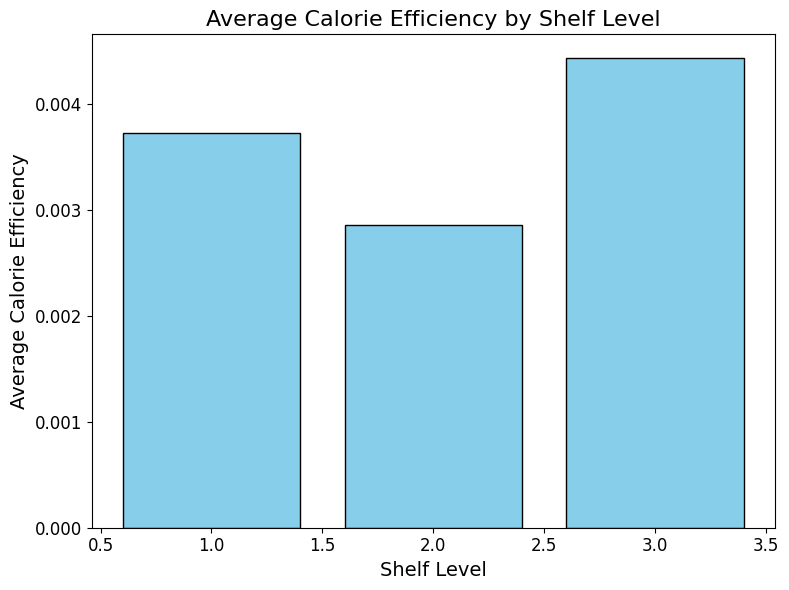

In [43]:
#  4. compare calorie efficiency with shelf level to see if cereals that are more calorie-efficient are placed on higher shelves

grouped_data = cereal_data.groupby(['shelf'])['calorie_efficiency'].mean()

plt.figure(figsize=(8, 6))
plt.bar(grouped_data.index, grouped_data.values, color='skyblue', edgecolor='black')

plt.title('Average Calorie Efficiency by Shelf Level', fontsize=16)
plt.xlabel('Shelf Level', fontsize=14)
plt.ylabel('Average Calorie Efficiency', fontsize=14)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()


The bar chart shows the average calorie efficiency of cereals by shelf level, indicating that cereals on different shelves have slightly different average calorie efficiencies, but without a clear pattern to suggest that shelf level correlates strongly with calorie efficiency.

### Conclusions

In our analysis of 77 breakfast cereals, we explored various nutritional metrics and their correlation with consumer ratings. Our findings highlight several key insights:

    Rating vs. Shelf Level: Our analysis did not show a clear trend connecting higher ratings to higher shelf placements. This suggests that factors other than consumer ratings might influence shelf decisions by retailers.

    Manufacturer Dominance: Kelloggs and General Mills dominate the market with the most products. However, Nabisco cereals often received higher ratings, suggesting a possible correlation between manufacturer and consumer satisfaction.

    Caloric Efficiency and Shelf Placement: There is a positive correlation between fiber content and cereal ratings, indicating that cereals with higher fiber content tend to be rated more favorably by consumers. This might reflect a consumer preference for healthier cereal options.

    Fiber Content and Caloric Efficiency: Higher fiber cereals were generally more calorie-efficient, providing more dietary fiber per calorie, which supports the trend towards health-conscious consumer choices in cereal products.

    Fiber Content and Cereal Type: Analysis of fiber distribution by cereal type showed that cold cereals typically have higher fiber content than hot cereals, aligning with higher ratings for cold cereals.

    Sugar and Fat vs. Fiber: Our comparative analysis demonstrated that most cereals have higher combined sugar and fat content compared to fiber. This suggests a nutritional imbalance in many cereals, which could influence consumer health perceptions and ratings.


The data indicate a competitive landscape with Kellogg's and General Mills leading in product offerings. The examination of nutritional efficiency, particularly calories per gram of protein, uncovered no definitive correlation with consumer ratings, suggesting that protein efficiency is not a sole determinant of consumer preference.

A key insight is the positive association between fiber content and consumer ratings, a recurring theme that underscores a trend toward health-conscious choices. However, the health value of cereals, encompassing various nutritional metrics, shows a more complex relationship with ratings. This complexity is further evidenced by the variable distribution of health values across shelf levels, implying that placement strategy may not be solely determined by nutritional value.

Interestingly, average ratings were relatively consistent across shelf levels, disassociating shelf placement from perceived consumer value. Yet, a strong positive relationship between fiber content and calorie efficiency suggests that consumers value nutritional quality, specifically dietary fiber, without a significant impact on shelf placement strategy.

The diverse nutritional focus of cereals, from high sugar and fat to high fiber, caters to varied consumer needs and dietary preferences. This is evident in the substantial range in health values among cereals, from nutrient-dense options like 'All-Bran with Extra Fiber' to less nutrient-dense options like 'Cocoa Puffs'.

Overall, the data demonstrate that consumer preferences for breakfast cereals are influenced by a blend of health consciousness and taste preferences, with manufacturers catering to this demand spectrum through a broad range of products. The lack of a strong correlation between health value and shelf level suggests that additional factors such as marketing, brand recognition, and pricing strategies play significant roles in shelf placement decisions.

Future research could delve into the impact of marketing and packaging on consumer choices, examine regional or demographic variations in preferences, and analyze seasonal and trend data to provide a more nuanced understanding of consumer behavior and retail strategies in the cereal market.